In [22]:
%cd /content/drive/MyDrive/Data Mining/4. Clustering - Gaussian Mixture Model

/content/drive/MyDrive/Data Mining/4. Clustering - Gaussian Mixture Model


In [23]:
#libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [24]:
dataset = pd.read_csv('Wine-quality-challenge.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<function matplotlib.pyplot.show(close=None, block=None)>

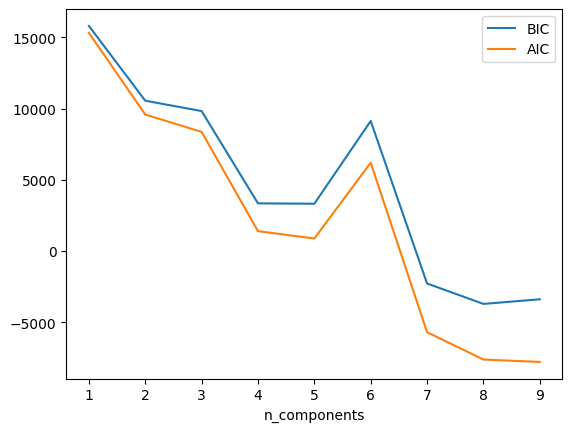

In [25]:
#Find optimal number of clusters
n_components = np.arange(1, 10)
models = [GaussianMixture(n, random_state=1502).fit(dataset)
          for n in n_components]
plt.plot(n_components, [m.bic(dataset) for m in models], label='BIC')
plt.plot(n_components, [m.aic(dataset) for m in models], label='AIC')
plt.legend()
plt.xlabel('n_components')
plt.show

In [26]:
#GMM
model = GaussianMixture(n_components=4, random_state=1502).fit(dataset)

In [27]:
#interpretation
interpretation = pd.DataFrame(model.means_, columns=list(dataset.columns))
interpretation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.539335,0.462025,0.293123,2.175013,0.076391,14.914106,33.092669,0.996417,3.313492,0.687474,10.809347,6.263148
1,8.268824,0.542497,0.308997,4.683531,0.084890,19.691251,61.692551,0.996988,3.335203,0.669907,11.135933,5.805180
2,8.165858,0.575129,0.231295,2.242432,0.082253,16.325932,54.111389,0.997004,3.312991,0.589539,9.885936,5.000000
3,8.046927,0.605108,0.277370,2.094785,0.163160,12.425945,51.445348,0.996790,3.255260,0.793264,9.811482,5.191712
